In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Checking the shape and information of the data


In [3]:
df.shape

(8425, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
#RainToday and RainTomorrow are objects and need to be converted to binary


In [6]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


# Checking the null values


In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

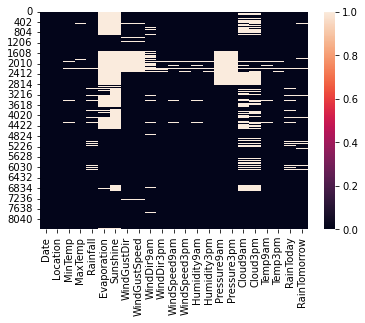

In [8]:
sns.heatmap(df.isnull())

# Checking if the dataset is unbalanced or balanced. 


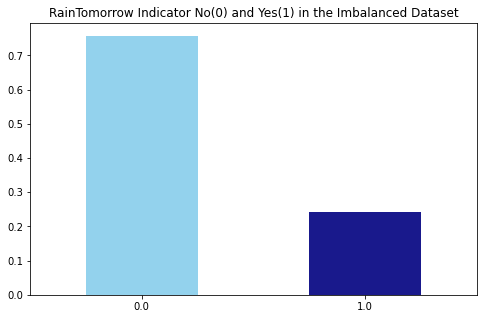

In [9]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()


In [10]:
#We see that the presence of “0” and “1” is almost in the 78:22 ratio. So there is a class imbalance and we have to deal with it.
#To handle class imbalance,we use oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.


In [11]:
from sklearn.utils import resample


In [12]:
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])


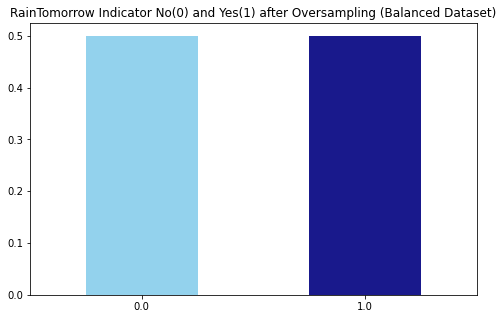

In [13]:
fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


In [14]:
#Checking for missing data model in the dataset and plotting heatmap


<AxesSubplot:>

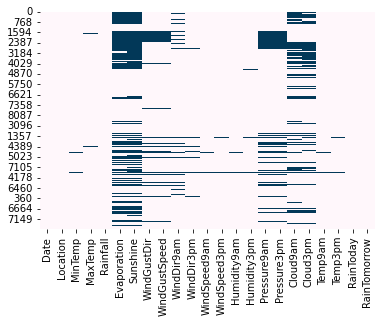

In [15]:
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')


In [16]:
# “Evaporation”, “Sunshine”, “Cloud9am”, “Cloud3pm” are the features with a high missing percentage.


In [17]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)


,Total,Percent
Sunshine,5886,0.475061
Evaporation,5186,0.418563
Cloud9am,3202,0.258434
Cloud3pm,3197,0.258031


In [18]:
#We see that 4 features have less than 50 per cent missing data.
#So instead of rejecting them completely, we’ll consider them in our model with proper imputation.


In [19]:
#Imputing categorical columns with mode, and then we will use the label encoder to convert them to numeric numbers 
#Then we will detect outliers using the interquartile range and remove them to get the final working dataset.
#Checking the correlation between the different variables, and if we find a pair of highly correlated variables, 


In [20]:
oversampled.select_dtypes(include=['object']).columns


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [21]:
# Imputing categorical values with Mode


In [22]:
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])


# Convert categorical features to continuous features with Label Encoding


In [23]:
from sklearn.preprocessing import LabelEncoder


In [24]:
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])


In [25]:
import warnings
warnings.filterwarnings("ignore")


In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)


In [27]:
#Our dataset has no “NaN” value. We will now detect and eliminate outliers from the inter-quartile interval-based data set.


In [28]:
# Detecting outliers with IQR


In [29]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Date             1431.750000
Location            5.000000
MinTemp             8.300000
MaxTemp             8.400000
Rainfall            3.200000
Evaporation         4.238617
Sunshine            6.344000
WindGustDir         9.000000
WindGustSpeed      20.000000
WindDir9am          9.000000
WindDir3pm          7.000000
WindSpeed9am       13.000000
WindSpeed3pm       15.000000
Humidity9am        24.000000
Humidity3pm        27.123541
Pressure9am         8.200000
Pressure3pm         8.000000
Cloud9am            4.068659
Cloud3pm            4.000000
Temp9am             8.000000
Temp3pm             8.075000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


MinTemp             AxesSubplot(0.125,0.816017;0.227941x0.0639831)
MaxTemp          AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
Rainfall         AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
Evaporation         AxesSubplot(0.125,0.739237;0.227941x0.0639831)
Sunshine         AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
WindGustSpeed    AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
WindSpeed9am        AxesSubplot(0.125,0.662458;0.227941x0.0639831)
WindSpeed3pm     AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
Humidity9am      AxesSubplot(0.672059,0.662458;0.227941x0.0639831)
Humidity3pm         AxesSubplot(0.125,0.585678;0.227941x0.0639831)
Pressure9am      AxesSubplot(0.398529,0.585678;0.227941x0.0639831)
Pressure3pm      AxesSubplot(0.672059,0.585678;0.227941x0.0639831)
Cloud9am            AxesSubplot(0.125,0.508898;0.227941x0.0639831)
Cloud3pm         AxesSubplot(0.398529,0.508898;0.227941x0.0639831)
Temp9am          AxesSubplot(0.672059,0.508898;0.227941x0.0639

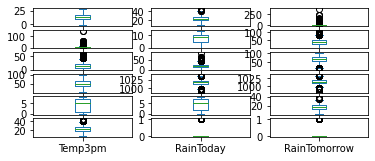

In [36]:

df.plot(kind='box',subplots=True,layout=(10,3))

# Removing outliers from the dataset


In [37]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape


(9748, 23)

# Data Correlation

In [39]:
MiceImputed.corr()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.447347,-0.017607,0.095876,-0.017816,0.353656,0.031842,-0.090380,-0.107465,-0.050353,...,0.110144,-0.044608,0.106228,0.068632,0.006042,-0.024863,0.046338,0.107038,-0.028732,0.003975
Location,0.447347,1.000000,0.086298,0.052866,-0.014636,0.344955,-0.037916,0.010868,0.194836,-0.039300,...,0.013574,0.049078,0.005213,0.018818,0.058687,0.056062,0.093962,0.053500,-0.028285,-0.000793
MinTemp,-0.017607,0.086298,1.000000,0.727720,0.048636,0.600335,0.057027,-0.149179,0.194895,-0.032015,...,-0.109706,0.114650,-0.451421,-0.426035,0.127378,0.070006,0.896272,0.691138,0.042755,0.103547
MaxTemp,0.095876,0.052866,0.727720,1.000000,-0.197702,0.667384,0.540311,-0.222053,0.101467,-0.189208,...,-0.348447,-0.374762,-0.317004,-0.394852,-0.314995,-0.326411,0.865238,0.973823,-0.219244,-0.154536
Rainfall,-0.017816,-0.014636,0.048636,-0.197702,1.000000,-0.146841,-0.286365,0.094101,0.071533,0.104762,...,0.325547,0.285163,-0.108532,-0.033123,0.275776,0.246422,-0.095335,-0.204418,0.834818,0.265120
Evaporation,0.353656,0.344955,0.600335,0.667384,-0.146841,1.000000,0.386708,-0.090138,0.273739,0.040048,...,-0.446342,-0.276963,-0.277692,-0.271539,-0.152843,-0.210591,0.680288,0.641172,-0.167950,-0.130818
Sunshine,0.031842,-0.037916,0.057027,0.540311,-0.286365,0.386708,1.000000,-0.058436,0.024673,-0.016800,...,-0.532539,-0.719721,0.001162,-0.060235,-0.773888,-0.797898,0.305362,0.570241,-0.289963,-0.495143
WindGustDir,-0.090380,0.010868,-0.149179,-0.222053,0.094101,-0.090138,-0.058436,1.000000,0.135712,0.376973,...,0.003538,0.034926,-0.136261,-0.028044,0.099556,0.087227,-0.173222,-0.236118,0.103700,0.035304
WindGustSpeed,-0.107465,0.194836,0.194895,0.101467,0.071533,0.273739,0.024673,0.135712,1.000000,-0.007279,...,-0.298856,-0.091030,-0.389631,-0.332987,0.033943,0.116137,0.161104,0.054780,0.075127,0.192088
WindDir9am,-0.050353,-0.039300,-0.032015,-0.189208,0.104762,0.040048,-0.016800,0.376973,-0.007279,1.000000,...,-0.030058,0.080534,0.008268,0.117312,0.072129,0.057813,-0.075527,-0.196179,0.114204,0.018597


<AxesSubplot:>

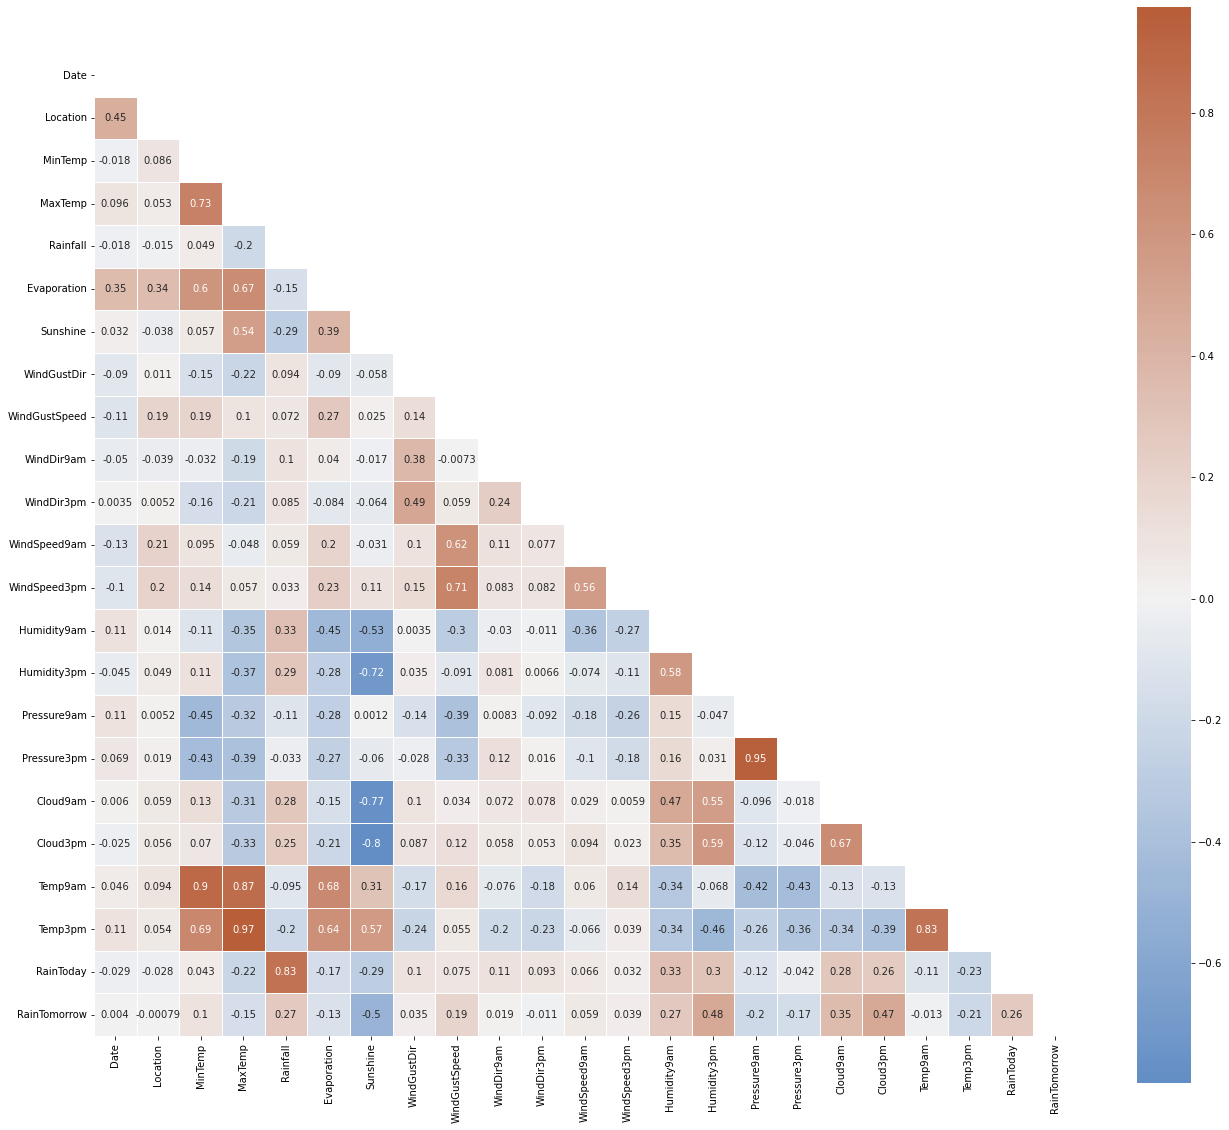

In [41]:
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})


In [42]:
#MaxTemp and MinTemp, Pressure9am and pressure3pm, Temp9am and Temp3pm, Evaporation and MaxTemp, MaxTemp and Temp3pm have a strong correlation with each other


In [ ]:
sns.pairplot( data=MiceImputed)


# Feature Selection


In [46]:
#Selecting features by filtering method (chi-square value)

# Standardizing data
from sklearn import preprocessing


In [47]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)


In [48]:
# Feature Importance using Filter Method (Chi-Square)


In [49]:
from sklearn.feature_selection import SelectKBest, chi2


In [50]:
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])


Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


In [51]:
#We can observe that “Sunshine”, “Humidity9am”, “Humidity3pm”, “Pressure9am”, “Pressure3pm” have higher importance compared to other features.


In [52]:
#feature selection by random forest


In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf


In [54]:
X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)


['Date', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm']
[0.04552285 0.02167373 0.03696247 0.03299921 0.02891997 0.0351255
 0.1177546  0.02179026 0.05071181 0.02497631 0.0259351  0.02587539
 0.02833827 0.04441683 0.11580411 0.04671925 0.05793059 0.04206377
 0.10439172 0.03533102 0.03867535 0.0180819 ]


In [55]:
#Training Rainfall Prediction Model with Different Models


In [56]:
#Dividing the  dataset into training (75%) and test (25%) sets respectively to train the rainfall prediction model. 
#For best results, we will standardize our X_train and X_test data:


In [57]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']


# Split into test and train


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


In [59]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [60]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [61]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report


In [62]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 0.7825194911776775
ROC Area under Curve = 0.7770931872873621
Cohen's Kappa = 0.5578440649001561
Time taken = 0.10269379615783691
              precision    recall  f1-score   support

         0.0    0.78506   0.83196   0.80783      1339
         1.0    0.77898   0.72222   0.74953      1098

    accuracy                        0.78252      2437
   macro avg    0.78202   0.77709   0.77868      2437
weighted avg    0.78232   0.78252   0.78156      2437



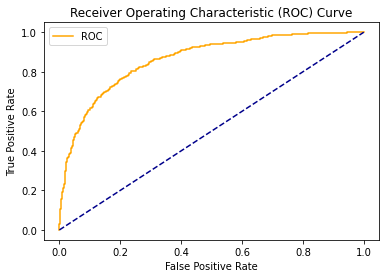

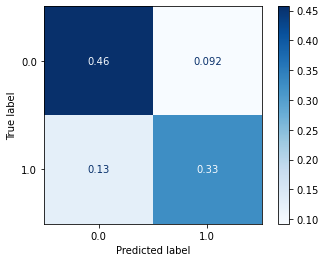

In [63]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


In [64]:
#We got the accuracy f1 score as 0.78252  


Accuracy = 0.9125974558883874
ROC Area under Curve = 0.9134144367313236
Cohen's Kappa = 0.8240597222339912
Time taken = 0.016924381256103516
              precision    recall  f1-score   support

         0.0    0.93374   0.90515   0.91923      1339
         1.0    0.88850   0.92168   0.90478      1098

    accuracy                        0.91260      2437
   macro avg    0.91112   0.91341   0.91200      2437
weighted avg    0.91336   0.91260   0.91272      2437



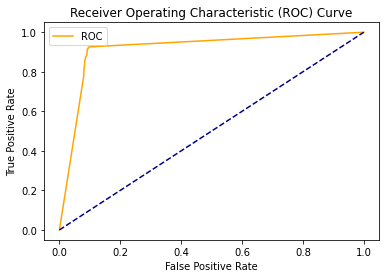

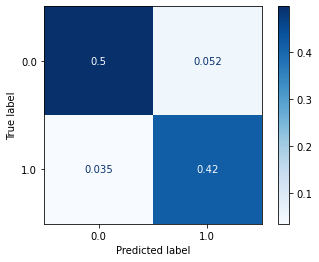

In [65]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)


In [66]:
#We got the accuracy f1 score as 0.88346


Accuracy = 0.9626590069757899
ROC Area under Curve = 0.9633966843102607
Cohen's Kappa = 0.9247469672892423
Time taken = 0.8626940250396729
              precision    recall  f1-score   support

         0.0    0.97561   0.95594   0.96567      1339
         1.0    0.94756   0.97086   0.95906      1098

    accuracy                        0.96266      2437
   macro avg    0.96158   0.96340   0.96237      2437
weighted avg    0.96297   0.96266   0.96270      2437



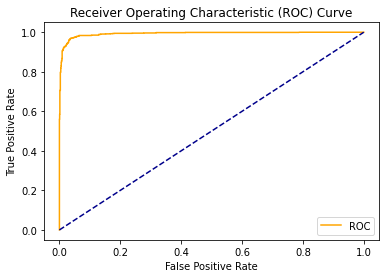

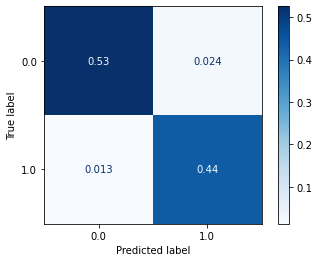

In [67]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)


In [68]:
#We got the accuracy f1 score as 0.96266 


Accuracy = 0.9610176446450553
ROC Area under Curve = 0.961821071919751
Cohen's Kappa = 0.9214519889001718
Time taken = 62.27015256881714
              precision    recall  f1-score   support

         0.0    0.97481   0.95370   0.96414      1339
         1.0    0.94499   0.96995   0.95730      1098

    accuracy                        0.96102      2437
   macro avg    0.95990   0.96182   0.96072      2437
weighted avg    0.96137   0.96102   0.96106      2437



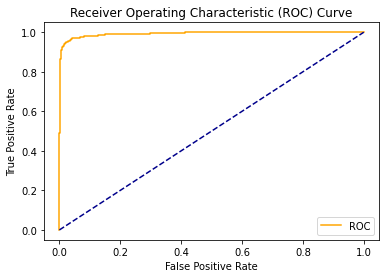

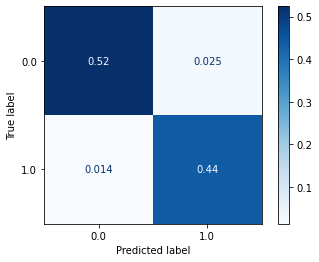

In [69]:
# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)


In [70]:
#Plotting Decision Region for all Models


In [ ]:
#We can observe the difference in the class limits for different models, including the set one (the plot is done considering only the training data). CatBoost has the distinct regional border compared to all other models. However, the XGBoost and Random Forest models also have a much lower number of misclassified data points compared to other models.


In [ ]:
#Now we need to decide which model performed best based on Precision Score, ROC_AUC, Cohen’s Kappa and Total Run Time. One point to mention here is: we could have considered F1-Score as a better metric for judging model performance instead of accuracy, but we have already converted the unbalanced dataset to a balanced one, so consider accuracy as a metric for deciding the best model is justified in this case.

#For a better decision, we chose “Cohen’s Kappa” which is actually an ideal choice as a metric to decide on the best model in case of unbalanced datasets. Let’s check which model worked well on which front:


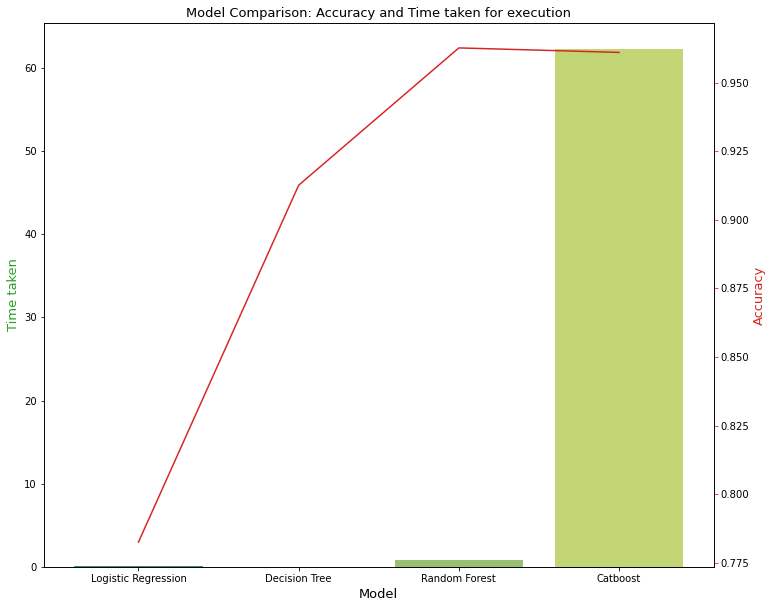

In [77]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_cb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_cb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_cb]
tt = [tt_lr, tt_dt, tt_rf, tt_cb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','Catboost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


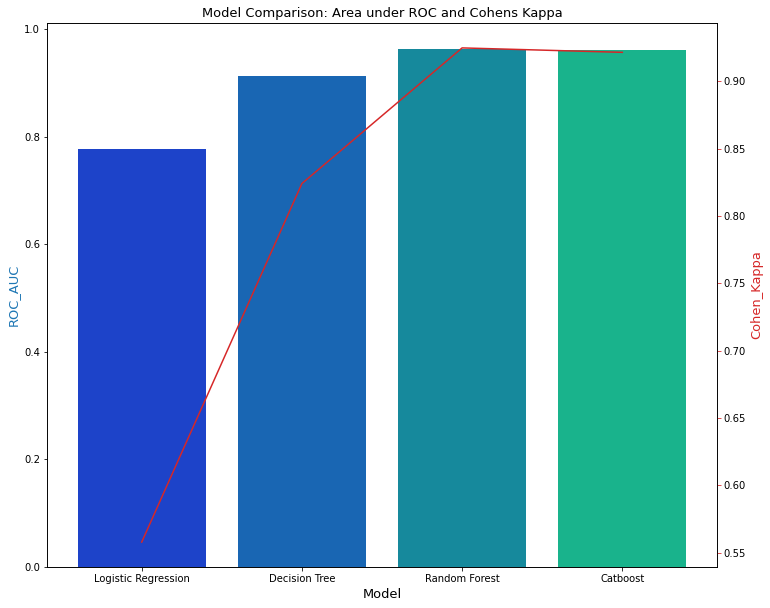

In [78]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()


In [ ]:
#We can observe that CatBoost and Random Forest performed better compared to other models. However, if speed is an important thing to consider, we can stick with Random Forest instead of CatBoost.


# Save the model

In [ ]:
import joblib
joblib.dump(clf3,"Rainfall-Prediction.pkl")
